In [19]:
!pip install torch
!pip install imageio

In [37]:
import torch
import imageio
import os
import matplotlib.pyplot as plt
import csv
import numpy as np

In [3]:
# Random image tensor with 3 channels, height 5, width 5
img_t = torch.rand(3,5,5) 
weights = torch.tensor([0.2126, 0.7152, 0.0722])
batch_t = torch.randn(2, 3, 5, 5)

print(img_t)
print("--------------------------------")
print(batch_t)

tensor([[[0.3426, 0.1222, 0.7235, 0.5257, 0.8505],
         [0.5590, 0.5888, 0.7429, 0.6327, 0.4785],
         [0.6143, 0.1113, 0.5369, 0.4803, 0.9951],
         [0.3004, 0.4036, 0.4837, 0.4666, 0.1868],
         [0.6521, 0.7545, 0.8253, 0.3553, 0.9360]],

        [[0.6148, 0.3476, 0.8186, 0.1426, 0.6820],
         [0.0427, 0.6943, 0.2881, 0.1690, 0.7092],
         [0.1692, 0.7312, 0.1051, 0.9945, 0.0132],
         [0.7250, 0.1424, 0.8962, 0.8020, 0.5652],
         [0.5893, 0.8354, 0.1492, 0.2275, 0.5957]],

        [[0.8141, 0.0447, 0.6656, 0.2322, 0.9807],
         [0.1881, 0.5119, 0.4112, 0.9843, 0.9650],
         [0.8825, 0.9030, 0.0014, 0.7865, 0.1721],
         [0.5991, 0.4607, 0.8201, 0.9002, 0.5467],
         [0.3281, 0.8976, 0.9832, 0.8793, 0.0096]]])
--------------------------------
tensor([[[[ 9.2267e-01,  1.2748e-01,  5.1107e-01, -1.0410e+00, -1.0336e+00],
          [-7.4446e-01,  8.1640e-01,  6.3532e-01, -1.1722e-01, -1.2704e+00],
          [ 1.6858e-01, -4.2294e-02,  1.40

In [4]:
img_gray_naive = img_t.mean(-3)
print(img_gray_naive)
# -3 refers to the channel dimension in a 3D tensor (C, H, W)
batch_gray_naive = batch_t.mean(-3)
print(batch_gray_naive.shape)

tensor([[0.5905, 0.1715, 0.7359, 0.3002, 0.8377],
        [0.2633, 0.5983, 0.4808, 0.5953, 0.7176],
        [0.5553, 0.5818, 0.2144, 0.7538, 0.3935],
        [0.5415, 0.3356, 0.7333, 0.7229, 0.4329],
        [0.5232, 0.8292, 0.6526, 0.4874, 0.5137]])
torch.Size([2, 5, 5])


### Tensor Storage

A Pytorch is basically just a wrapper or view around the actual memory/data, and because indexing or transforming a tensor usually does not create new copies that data but instead shares the same underlying Stoarage. This makes tensor to be efficient

In [5]:
points = torch.tensor([[4.0, 1.0], [2.0, 2.0], [0.0, 3.0]])
point_storage = points.storage()

print(point_storage)
print("Index at 0 in point_storage: ", point_storage[0])
print("Index at 1 in point_stoarge: ", points.storage()[1])
print("Set point Stoarage at 0")

point_storage[0] = 2.0
print(points)

 4.0
 1.0
 2.0
 2.0
 0.0
 3.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]
Index at 0 in point_storage:  4.0
Index at 1 in point_stoarge:  1.0
Set point Stoarage at 0
tensor([[2., 1.],
        [2., 2.],
        [0., 3.]])


C:\Users\skcjf\AppData\Local\Temp\ipykernel_22796\424574483.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  point_storage = points.storage()


### Tensor Metadata
* size, offset, and stride

In [9]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
print(second_point)

# Storage offset of second point
print("Storage offset of second point: ")
print(second_point.storage_offset())

# Stride of second points tensor
print("Stride of second points tensor: ")
print(second_point.stride())

# Stride of points tensor
print("Stride of points tensor: ")
print(points.stride())

# Get the size of second point tensor
print("Size of second point tensor: this means stride 0")
print(second_point.size())


tensor([5., 3.])
Storage offset of second point: 
2
Stride of second points tensor: 
(1,)
Stride of points tensor: 
(2, 1)
Size of second point tensor: this means stride 0
torch.Size([2])


In [7]:
# Copying tensors without modifying the original tensor
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])

points_t = points.t()
print(points_t)

print(id(points.storage()) == id(points_t.storage()))
print(points.stride())
print(points_t.stride())

# Check whether memory is contiguous
print(points.is_contiguous())
print(points_t.is_contiguous())

# So the transpose created a non-contiguous tensor
print(points_t)
print(points_t.storage())
points_t_contig = points_t.contiguous()
print(points_t_contig)
print(points_t_contig.stride())

tensor([[4., 5., 2.],
        [1., 3., 1.]])
True
(2, 1)
(1, 2)
True
False
tensor([[4., 5., 2.],
        [1., 3., 1.]])
 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]
tensor([[4., 5., 2.],
        [1., 3., 1.]])
(3, 1)


### Moving Tensors to GPU
* This tensor will be located in GPU memory(RAM)

### Numpy Compatibility
* Tensors on CPU and Numpy arrays can share their underlying memory locations, and changing one will change the other.

In [9]:
points_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], device='cuda')
points_gpu = points.to(device='cuda')

In [11]:
# points = 2 * points # runs on CPU
points_gpu = 2 * points_gpu # runs on GPU

# bring back to CPU
points_cpu = points_gpu.to(device='cpu')

In [17]:
points = torch.ones(3,4)
points_np = points.numpy()

print(points_np.dtype)
print(points.dtype)

float32
torch.float32


### Image Loading with Tensors

In [28]:
img_arr = imageio.imread('../pytorch/Resource/img/bobby.jpg')
img_arr.shape

# H X W X C -> C X H X W
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

# Batch of Images
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

data_dir = '../pytorch/Resource/img/'

filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    batch[i] = img_t
    
# Data Regularization
batch = batch.float() / 255.0

n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

C:\Users\skcjf\AppData\Local\Temp\ipykernel_20616\1161280562.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('../pytorch/img/bobby.jpg')
C:\Users\skcjf\AppData\Local\Temp\ipykernel_20616\1161280562.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


### Volumetric Data with Tensors
* 3D images (CT, MRI scans) can be represented as 3D tensors
* Data Folders are located in "./Resource/volumetric_data/"

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
(99, 512, 512)
torch.Size([1, 99, 512, 512])


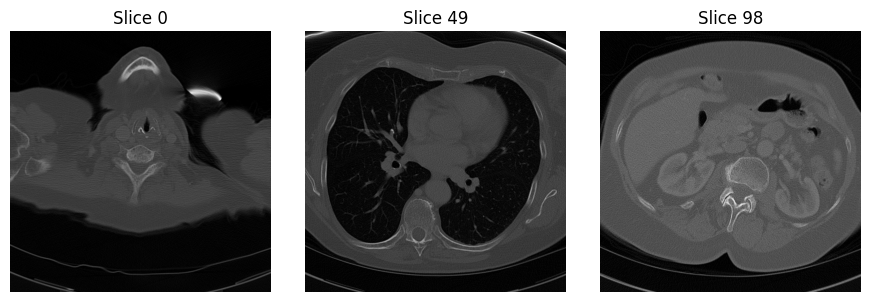

In [36]:
dir_path = '../pytorch/Resource/volumetric_data/'
vol_arr = imageio.volread(dir_path, 'DICOM')
print(vol_arr.shape)

vol= torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, dim=0) # add batch dimension
print(vol.shape)

# Visualize a few slices from the volumetric data
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Get 3 slices from different depths (start, middle, end)
slices = [0, vol_arr.shape[0] // 2, vol_arr.shape[0] - 1]

for idx, slice_idx in enumerate(slices):
    axes[idx].imshow(vol_arr[slice_idx], cmap='gray')
    axes[idx].set_title(f'Slice {slice_idx}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


### Tabular Data with Tensors

In [41]:
wine_data_path = '../pytorch/Resource/tabular/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_data_path, dtype=np.float32, delimiter=';', skiprows=1)
print(wineq_numpy)

col_list = next(csv.reader(open(wine_data_path), delimiter=';'))
print(wineq_numpy.shape)
print(col_list)

wineq = torch.from_numpy(wineq_numpy)
print(wineq.dtype, wineq.shape)

[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
(4898, 12)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
torch.float32 torch.Size([4898, 12])


In [44]:
data = wineq[:, :-1]
print(data, data.shape)

target = wineq[:, -1]
print(target, target.shape)

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]) torch.Size([4898, 11])
tensor([6., 6., 6.,  ..., 6., 7., 6.]) torch.Size([4898])


In [48]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1).long(), 1.0)
print(target_onehot, target_onehot.shape)
print(target_onehot[0])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) torch.Size([4898, 10])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])


In [51]:
data_mean = torch.mean(data, dim=0)
print(data_mean)

data_var = torch.var(data, dim=0)
print(data_var)

data_norm = (data - data_mean) / torch.sqrt(data_var)
print(data_norm, data_norm.shape)

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])
tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])
tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]]) torch.Size([4898, 11])
